In [2]:
%matplotlib inline
import math
import os
import random
import atari_py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
pong_path = atari_py.get_game_path('pong')
ale = atari_py.ALEInterface()
ale.loadROM(pong_path)
action_set = ale.getMinimalActionSet()
(screen_width,screen_height) = ale.getScreenDims()
arr = np.zeros((screen_height, screen_width, 4), dtype=np.uint8)
frame_dir="out"
os.makedirs(frame_dir) if not os.path.isdir(frame_dir) else print("dir exists")

dir exists


In [4]:
# build graph for network
# raw input from atari game
X=tf.placeholder(tf.float32,[None,screen_height,screen_width,3])

# first conv block
conv2d_1=tf.contrib.layers.conv2d(X,32,8,stride=4,activation_fn=None)
conv2d_1=tf.nn.relu(conv2d_1)
print(conv2d_1.shape)

# second conv block
conv2d_2=tf.contrib.layers.conv2d(conv2d_1,64,4,stride=2,activation_fn=None)
conv2d_2=tf.nn.relu(conv2d_2)
print(conv2d_2.shape)

# third conv block
conv2d_3=tf.contrib.layers.conv2d(conv2d_2,64,3,stride=1,activation_fn=None)
conv2d_3=tf.nn.relu(conv2d_3)
print(conv2d_3.shape)

# flatten out the tensor to a vector
flat_output=tf.contrib.layers.flatten(conv2d_3)
print(flat_output.shape)

# final hidden layer
fc_output=tf.contrib.layers.fully_connected(flat_output,512,activation_fn=None)
fc_output=tf.nn.relu(fc_output)
print(fc_output.shape)

#output layer for an arbitry number n of actions
num_of_actions=len(action_set)
output=tf.contrib.layers.fully_connected(fc_output,num_of_actions,activation_fn=None)
print(output.shape)

(?, 53, 40, 32)
(?, 27, 20, 64)
(?, 27, 20, 64)
(?, 34560)
(?, 512)
(?, 6)


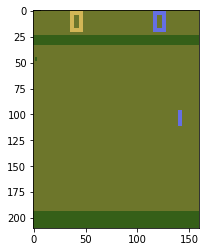

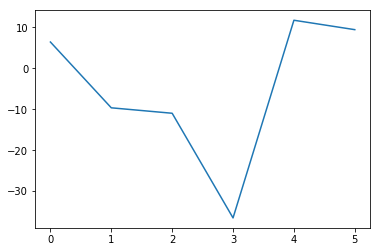

In [43]:
os.system("sh clean.sh")
arr_rgb = np.zeros((screen_height, screen_width, 3), dtype=np.uint8)
ale.reset_game()
sess=tf.InteractiveSession()
tf.global_variables_initializer().run()

steps=1
for i in range(steps):
    frames=[]
    for i in range(4):
        ale.getScreenRGB2(arr_rgb)
        frames.append(arr_rgb)
    plt.imshow(arr_rgb)
    frames=np.stack(frames)
    fd={X:frames}
    actions=sess.run([output],fd)[0]
    plt.figure()
    plt.plot(actions[0])